In [17]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
# https://albertcthomas.github.io/good-practices-random-number-generators/
# plt.rcParams["font.sans-serif"] = "Arial Unicode MS"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
# plt.rcParams["axes.unicode_minus"] = False
# mlib.rc('xtick', labelsize=15) 
# mlib.rc('ytick', labelsize=15) 
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2022-12-03 13:55:17,044	INFO services.py:1274 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '10.192.9.221',
 'raylet_ip_address': '10.192.9.221',
 'redis_address': '10.192.9.221:6379',
 'object_store_address': 'tcp://127.0.0.1:60696',
 'raylet_socket_name': 'tcp://127.0.0.1:55439',
 'webui_url': '127.0.0.1:8265',
 'session_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\ray\\session_2022-12-03_13-55-11_849303_34552',
 'metrics_export_port': 58602,
 'node_id': '70d6f02d671be0d356aa3018d79bde14ba3d642a23130054b05aa7eb'}

In [3]:
seed = 20221203
np.random.seed(seed)
n_replications =2000
min_power = 2
max_power = 12
gamma = 0.1
var = 0.25

In [4]:
OCBA_results = []
Greedy_results =  []

In [5]:
rng = np.random.default_rng(seed)

for power in np.arange(min_power, max_power+1):
    generators = [SCCVGenerator(2**power, gamma, var) for i in range(n_replications)]
    n = 100
    PCS, PGS = parallel_experiments(rng,  generators, policy=OCBA, remote_policy=remote_OCBA,  
                                n0=n, n1=0, test_time=False)
    OCBA_results.append(PCS)
    n0 = 1
    n1 = 99
    PCS, PGS = parallel_experiments(rng,  generators, policy=EFG, remote_policy=remote_EFG,  
                                n0=n0, n1=n1, test_time=False)
    Greedy_results.append(PCS)

--------New experiments with  n_0=100, n_1=0 and k=4----------------------
Start to simulate...
PCS:0.826, PGS:0.826
Total time used: 1.459700584411621s
--------New experiments with  n_0=1, n_1=99 and k=4----------------------
Start to simulate...
PCS:0.4475, PGS:0.4475
Total time used: 1.4499468803405762s
--------New experiments with  n_0=100, n_1=0 and k=8----------------------
Start to simulate...
PCS:0.7105, PGS:0.7105
Total time used: 1.3807203769683838s
--------New experiments with  n_0=1, n_1=99 and k=8----------------------
Start to simulate...
PCS:0.3365, PGS:0.3365
Total time used: 1.4772531986236572s
--------New experiments with  n_0=100, n_1=0 and k=16----------------------
Start to simulate...
PCS:0.561, PGS:0.561
Total time used: 1.4792003631591797s
--------New experiments with  n_0=1, n_1=99 and k=16----------------------
Start to simulate...
PCS:0.282, PGS:0.282
Total time used: 1.5769336223602295s
--------New experiments with  n_0=100, n_1=0 and k=32-------------------

In [18]:
Greedy_results, OCBA_results = ([0.4475,
  0.3365,
  0.282,
  0.2805,
  0.247,
  0.2385,
  0.2635,
  0.244,
  0.227,
  0.2355,
  0.245],
 [0.826, 0.7105, 0.561, 0.39, 0.2315, 0.0955, 0.02, 0.002, 0.0, 0.0, 0.0])

In [19]:
results = [Greedy_results, OCBA_results]

In [22]:
labels = ['Greedy, $B=100k$', 'OCBA, $B=100k$']

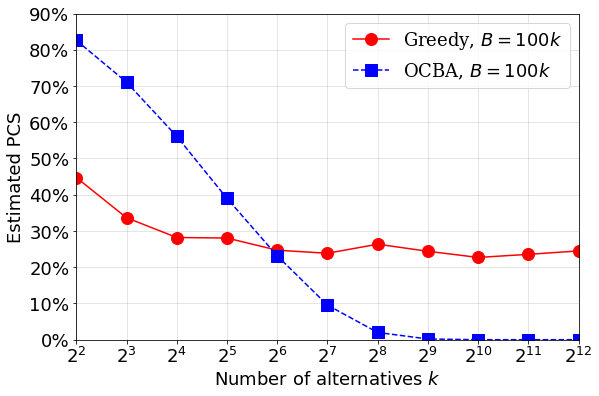

In [23]:

powers = np.arange(min_power, max_power+1)

colors = ["r" ,"b", "c", "m", "k"]
markers = ["o", "s", "d", "p", "*", "D"]
line_styles = ["-", "--", "-.",":",'-']
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
threslines = [0.225, 0.313]
fig = plt.figure(figsize=(9, 6))

for i, result in enumerate(results[:4]):
    plt.plot(powers, result, line_styles[i], marker=markers[i], markersize=12,  color=colors[i], label=labels[i])

plt.xlim(min_power, max_power)
xticks = np.arange(min_power, max_power+1)
xticklabels = ["2^{"+str(power)+"}" for power in xticks]
#xticklabels = [str(2 ** (power)) for power in xticks]
xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
plt.xticks(powers, xticklabels,fontsize=18)

min_result = np.min(results)
max_result = np.max(results)

min_level = (min_result // 0.1-1)*0.1
max_level = (max_result // 0.1 + 1)*0.1

plt.ylim(0,max_level)
yticks = np.arange(0., max_level+0.1, 0.1)
yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
plt.yticks(yticks, yticklabels, fontsize=18)

plt.legend(prop={'family': 'serif',"size":18})
plt.xlabel("Number of alternatives $k$", size=18)
plt.ylabel("Estimated PCS", size=18)
# plt.title("Problem 1")
plt.grid(alpha=0.4)
plt.savefig("CompareGreedyOCBA.pdf", bbox_inches ="tight")
plt.show()